# 고성능(15초) 텍스트입력 이미지 생성모델 사용하기 - Stable Diffusion

keras.io 가이드에서 소개된 Stable Diffusion를 빠르게 사용하는 방법에서 결론 부분 코드만 발췌해서 코랩에서 테스트해봤습니다. 15초 정도 안에 3장의 이미지를 생성할 수 있으니, 기다리는 시간을 줄이고 여러가지 시도를 해볼 수 있을 것 같습니다.

[High-performance image generation using Stable Diffusion in KerasCV](https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/)



## 환경설정

In [1]:
!pip install tensorflow keras_cv --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 394 kB 61.3 MB/s 
     |████████████████████████████████| 5.9 MB 43.2 MB/s 
     |████████████████████████████████| 438 kB 60.3 MB/s 
     |████████████████████████████████| 1.7 MB 51.0 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 9s (49.4 MB/s)
(Readi

## 필요한 패키지 불러오기

In [2]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

## 고성능을 위한 설정

* Mixed precision : 연산 속도를 높이기 위해서 float32 정밀도 가중치를 float16 정밀도로 계산하도록 설정합니다.

* XLA Compilation : 내장된 가속 선형 대수 컴파일러를 사용합니다.

In [3]:
keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion(jit_compile=True)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 5s 0us/step


## 가상 이미지 생성 (모델 사용)

In [7]:
# 이미지 표출 함수
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

25/25 [==============================] - 15s 601ms/step


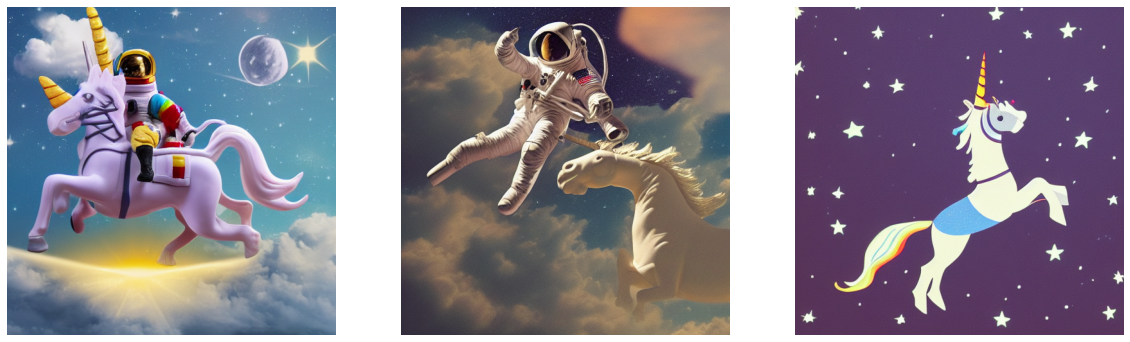

In [11]:
# 주어진 텍스트로 이미지를 생성합니다.

gen_image = model.text_to_image(
    "photograph of an astronaut riding unicorn",
    batch_size=3,
)

plot_images(gen_image)